In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Read in the csv
df = pd.read_csv('NVDA.csv')
df['Date'] = pd.to_datetime(df['Date'],utc=True)
df.set_index('Date', inplace=True)
df_resampled2 = df.resample('M').agg(['first','last'])
df['Hype Price'] = (df['Close']+df['Open']+df['High']+df['Low'])/4
df_resampled = df.resample('M').mean()

# Read trend csv
trend = pd.read_csv('TREND.csv')
trend['Month'] = pd.to_datetime(trend['Month'],utc=True)
trend.set_index('Month', inplace=True)
for col in trend.columns:
    trend[col] = trend[col].astype(str).str.replace('<1','1').astype(float)
trend.to_csv('TREND.csv')
trend['nvidia'] = (trend['Nvidia: (United States)']+trend['nvidia: (United States)'])/2 # Highly correlated


# Export resampled Open 1st of month and Close last to a csv
df_resampled2.drop(columns=['Volume','Dividends','High','Low','Stock Splits'],inplace=True)
df_resampled2.columns = ['_'.join(col).strip() for col in df_resampled2.columns.values]
df_resampled2.drop(columns=['Open_last', 'Close_first'], inplace=True) ; df_resampled2.columns = ['Open', 'Close']
df_resampled2.to_csv('OpenClosePrice.csv')

# Get rate of change of trend monthly
trend_rate = trend.pct_change()
# Change names of columns
trend_rate.rename(columns={'NASDAQ:NVDA: (United States)': 'NVDA'}, inplace=True)
trend_rate.drop(columns=['Nvidia: (United States)','nvidia: (United States)'], inplace=True)

# Get rate of change of stock monthly
df_resampled_rate = df_resampled.pct_change()
df_resampled_rate.rename(columns={'Hype Price': 'NVDA Monthly'}, inplace=True)
df_resampled_rate = df_resampled_rate[['NVDA Monthly', 'Volume']]


# Export aggregated data to a csv
to_R = pd.concat([df_resampled_rate, trend_rate], axis=1)
to_R = to_R.resample('M').mean()
# to_R['Price + Hype'] = to_R['NVDA Monthly'] + to_R['nvidia']
to_R.to_csv('aggregated.csv')

                           nvidia: (United States)  \
Month                                                
2004-01-01 00:00:00+00:00                      NaN   
2004-02-01 00:00:00+00:00                -0.127907   
2004-03-01 00:00:00+00:00                 0.053333   
2004-04-01 00:00:00+00:00                -0.075949   
2004-05-01 00:00:00+00:00                 0.095890   
...                                            ...   
2023-10-01 00:00:00+00:00                -0.021739   
2023-11-01 00:00:00+00:00                 0.200000   
2023-12-01 00:00:00+00:00                -0.037037   
2024-01-01 00:00:00+00:00                 0.134615   
2024-02-01 00:00:00+00:00                 0.169492   

                           NASDAQ:NVDA: (United States)  \
Month                                                     
2004-01-01 00:00:00+00:00                           NaN   
2004-02-01 00:00:00+00:00                      0.000000   
2004-03-01 00:00:00+00:00                      0.000000   
20

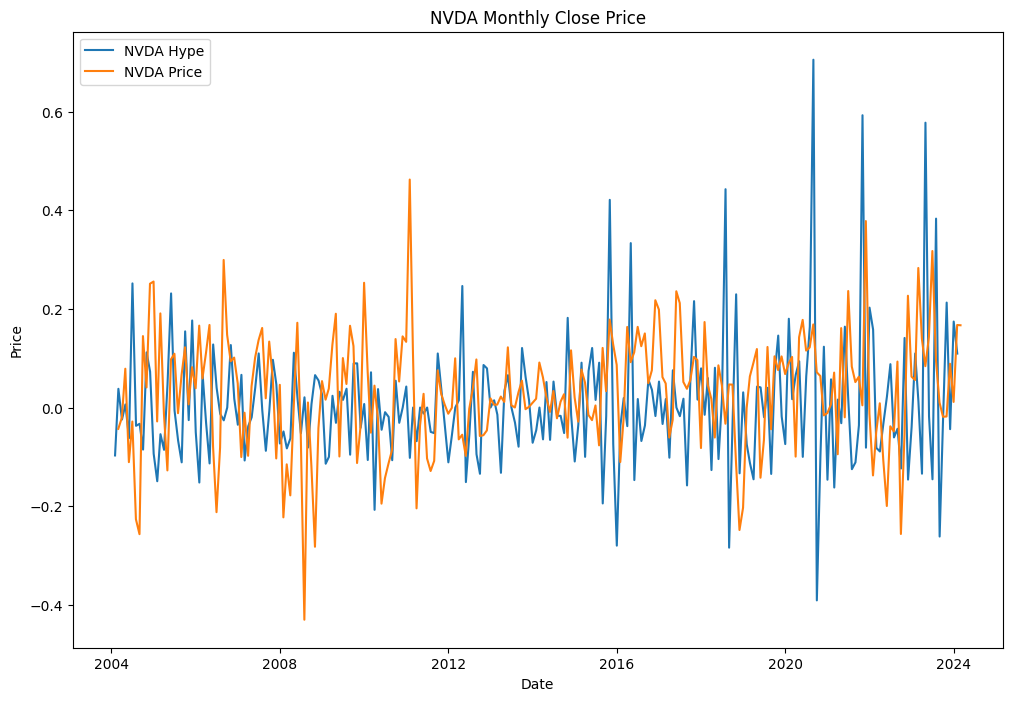

In [95]:
# Plot the data
plt.figure(figsize=(12,8))
plt.plot(trend_rate['nvidia'], label='NVDA Hype')
plt.plot(df_resampled_rate['NVDA Monthly'], label='NVDA Price')
# plt.plot(to_R['Price + Hype'], label='NVDA Price + Hype')
plt.title('NVDA Monthly Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()